<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_deep_learning/blob/master/machine_learning/lesson%201%20-%20linear%20regression/examples/linear-regression-deep-dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
<figure>
<img src='https://media.makeameme.org/created/brace-yourself-regression-599599.jpg' width='50%' height='50%'></img>
</figure>


Perhaps the most natural machine learning task to wrap our heads around is *regression*--a set of methods for modeling the relationship between one or more independent variables (i.e., $x$) and a dependent variable (i.e., $y$). Regression problems pop up whenever we want to output a *numeric* value. 

Most applications of regression fall into one of the following two broad categories:
- *inference* - to explain the relationship between the inputs and outputs (most common).
- *prediction* - to predict numeric outputs given inputs (most common in machine learning). 

A few everyday examples of regression include predicting prices (of homes, stocks, etc.), predicting length of stay (for patients in the hospital), and demand forecasting (for retail sales). 

## Linear Regression
<figure>
<img src='https://learningstatisticswithr.com/book/lsr_files/figure-html/regression1a-1.png' width='60%'></img>
</figure>


*Linear regression* is probably the simplest and most popular regression method. It is called "linear" regression because we **assume** that the relationship between the independent variables $x$ and the dependent variable  $y$ is linear--that is, $y$ can be expressed as a *weighted sum* of the elements in $x$, plus some *noise* in the data. In mathematical terms this can be expressed as: $$y = wx + b$$
where $w$ represents the learnable *weights* and $b$ the *bias* (i.e., you may recognize it as the *intercept*). The weights determine the influence of each feature on the prediction and the bias tells us what the predicted value would be if all the features $x$ values were 0. Given features of a training dataset  $X$  and corresponding (known) labels  $y$ , the goal of linear regression is to find the weight vector $w$  and the bias term  $b$  that given features of a new data sample from the dataset  $X$, the sample's label will (in expectation) be predicted with the lowest *error*.

To motivate the linear regression approach, suppose that we wish to estimate the prices of houses (in dollars) based on their area (in square feet). To actually fit a model for *predicting* house prices, we need to get our hands on a dataset consisting of sales for which we know the sale price and area for each home. In machine learning terminology, the dataset is called a *training dataset* or *training set*, and each row (the data corresponding to one sale) is called a *sample*. The thing we are trying to predict (price) is called a *label* (or *target*). The independent variables (only one in this case--area), upon which the predictions are based, are called *features*. 

Generally, we will use  $n$  to denote the total number of samples in our dataset. We index a sample by $i$, denoting each sample as  $x^{(i)}=[x^{(i)}_{1}]^{⊤}$  ($x^{(i)}_{1}$ represents the area) and the corresponding label as $y^{(i)}$.


## Linear Model


To make the above linear regression formula more concrete, let's translate it to our house prices example: 
$$\text{price} = w_{\text{area}}\cdot{area} + b $$
where $w_{\text{area}}$ is the learnable *weight* and $b$ is the *bias* (or *intercept*).

The goal is to choose the weight  $w$  and the bias  $b$  such that on average, the predictions made according to our model *best fit* the true prices observed in the data. 

Before we can go about searching for the best *parameters*  $w$  and  $b$, we will need two more things: (i) a way to measure the quality of the model; and (ii) a procedure for updating the model parameters to improve its accuracy.

# Loss Function
<figure>
<img src='https://d2l.ai/_images/fit_linreg.svg
' width='60%'></img><figcaption>Calculating loss: measuring the distance between the predicion and real value</figcaption>
</figure>


Before we build our model, we need to determine a measure of fitness. The *loss function* quantifies the distance between the *true* and *predicted* value of the *target*. The loss will usually be a non-negative number where smaller values are better and perfect predictions incur a loss of  0 . The most popular loss function in regression problems is the *sum of squared errors* (SSE). When our prediction for an example  $i$  is  $\hat{y}^{(i)}$  and the corresponding true label is  $y^{(i)}$ , the squared error is given by:
$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

The constant  1/2  makes no real difference but makes some future math more convenient, cancelling out when we take the *derivative* of the loss (don't worry if you don't know about derivatives yet). To make things more concrete, consider the example above where we plot a regression problem, the blue line corresponds to the prediction vs true value. 

To measure the quality of a model on the entire dataset, we simply *average* (or equivalently, sum) the losses on the training set.

$$
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.
$$

When training the model, we want to find parameters ( $w^{∗}$,$b^{∗}$ ) that minimize the total loss across all training examples:

$$
\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).
$$

But how do actualy find the best parameters to minimize the total loss? We'll use *gradient descent*--a fundemental concept in modern machine learning, particularly *deep learning*.


# Gradient Descent

<figure>
<img src='https://media0.giphy.com/media/O9rcZVmRcEGqI/source.gif' width='100%'></img><figcaption>Gradient descent: finding the best model parameters</figcaption>
</figure>

The key technique for optimizing nearly any deep learning model, and we can use for linear models too, consists of *iteratively* reducing the error by updating the parameters in the *direction* that incrementally *lowers* the loss function. This algorithm is called *gradient descent*. In general, we can find acceptable parameter values after many interations of reducing the loss.

The most naive application of gradient descent consists of taking the derivative of the true loss, which is an average of the losses computed on every single example in the dataset. In practice, this can be extremely slow. We must pass over the entire dataset before making a single update. Thus, we will often settle for sampling a random *batch* of samples every time we need to compute the update, this method is called *stochastic gradient descent*.


At a high level, the *stochastic gradient descent* method consists of feeding a random batch of samples to the model, computing the derivative (gradient) of the average loss with respect to the batch samples and the model's current parameter values. Finally, we update the model parameters by multiplying the gradient by a predetermined value called the *learning rate* $ > 0$ and substract the resulting output from the current parameter values.  

Let's summarize the steps of *stochastic gradient descent*: 
1. We initialize the values of the model parameters, typically with random values.
2. We iteratively sample random batches from the data (many times), updating the parameters in the direction of the negative gradient.
3. After many iterations, we hope that the estimated model parameters ($\hat{w}, \hat{b}$, the "hat" symbol denotes estimates) can produce acceptable predictions (close enough to the true values).

Linear regression can actually be solved using a simpler method than stochastic gradient descent, but the stochastic gradient descent algorithm is so fundemental to deep learning that we will use it for linear regression too. 


# Linear Regression: What makes us happy?
Now let's apply the linear regression method to a real-world problem--predicting happiness given features corresponding to a country's population. To fit a model, the process involves several steps: 

1. Find a dataset related to our question. 
2. Explore the dataset - clean the data and visualize it (if possible).
3. Prepare data for a *model*.
4. Build a model. 
5. Train the model using an algorithm such as stochastic gradient descent.
6. Evaluate the quality of our model.
7. Draw conclusions. 

For step 1, we found the World Happiness (https://www.kaggle.com/unsdsn/world-happiness) dataset. The dataset contains information about the state of global happiness with happiness scores and rankings for nearly every country on earth. Pretty cool right! Next, we explore the dataset and define our $x$ and $y$ variables. Then, we build a linear regression model. Following, we train the model using stochastic gradient descent. Finally we evaluate the model and draw conclusions.

In [1]:
# import the libraries we be need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1. Explore + Visualize the dataset

In [2]:
# load the dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_deep_learning/master/datasets/world-happiness/2019.csv'
happy2019 = pd.read_csv(data_url)
happy2019.head() # view the first 5 rows of the data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# how many rows and columns are in the dataset
happy2019.shape # looks like 156 rows and 9 columns

(156, 9)

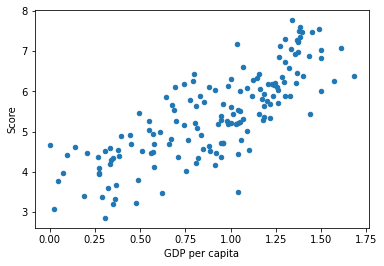

In [4]:
# visualize a scatter plot of GDP per capita and happiness score 
happy2019.plot.scatter(x='GDP per capita',
                      y='Score');

The relationship between GDP per capita and happiness Score seems relatively linear. Let's build a linear model to predict happiness score using the GDP per capita feature. Before we do, we need to prepare the training and test dataset our model will use.

## Prepare the Dataset 

In [5]:
# define the x and y variables 
x_col = 'GDP per capita'
y_col = 'Score'

# split the dataset into a training set and a test set.
# we will use the test set in the final evaluation of our model.
train = happy2019.sample(frac=0.8, random_state=0)
test = happy2019.drop(train.index)

# separate the x (features) and y (labels) in the train/test datasets
train_features = train[x_col].values.reshape(-1, 1)
test_features = test[x_col].values.reshape(-1, 1)

train_labels = train[y_col].values.reshape(-1, 1)
test_labels = test[y_col].values.reshape(-1, 1)


print('train features shape:', train_features.shape)
print('train labels shape:', train_labels.shape)

print('test features shape:', test_features.shape)
print('test labels shape:', test_labels.shape)

print('first 5 test labels:\n', test_labels[:5])

train features shape: (125, 1)
train labels shape: (125, 1)
test features shape: (31, 1)
test labels shape: (31, 1)
first 5 test labels:
 [[7.246]
 [6.726]
 [6.444]
 [6.354]
 [6.3  ]]


The above code returns a training and test dataset. The GDP per capita variable represents the  *features* data and the happiness Score represents the *labels*. There aretwo datasets--a *training dataset* and a *test dataset*. The `train_features` and `train_labels` arrays represent the features and labels of the training dataset, each containing 125 rows and 1 column. The `test_features` and `test_labels` arrays represent the features and labels of the test dataset, each containing 31 rows and 1 column.  

Now that we have the *features* and *labels* separated, we are ready to build our model!

## 2. Building a model

Before we model the relationship between happiness Score and GDP per capita, let's write what we know about single-variable linear regression. In short, single-variable linear regression tries to find a function that best fits our data (i.e., between an $x$ and $y$ variable). It is defined by the following formula: 
$$
y = wx + b
$$

We can translate this function to our problem to model the relationship between GDP per capita ($x$) and happiness Score ($y$) as follows:

$$ 
\text{score} = w_{\text{GDP per capita}} \cdot \text{GDP per capita} + b
$$

Coding linear regression from scratch can be tedious: we'd need to manually define the parameters (weights and bias), compute gradients, and update the parameters. Fortunately, there are amazing open source libraries we can use to make this process a bit easier. Specifically, we'll use [Tensorflow](https://www.tensorflow.org/) to build and evaluate our linear regression model. We will use the `Sequential` class to define a container for the *layers* of our model. Given input data, a `Sequential` object passes it through the first layer, which transforms it, and then passes it to the second layer, and so on. We don't really need to use this model structure for linear regression (as you saw last lesson). Nonetheless, nearly every model we build in this series will depend on the `Sequential` class and Tensorflow, so we will use it from here on out.


In [6]:
# build the linear model 
model = keras.Sequential([
            layers.Input((1,)), # the input layer (corresponds to GDP per capita)
            layers.Dense(1) # the weight
        ])

print('model summary')
print(model.summary())

model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


<!-- TODO: fix figure to one node -->
<figure>
<img src='https://d2l.ai/_images/singleneuron.svg' width='50%'></img><figcaption>Linear Regression: a single-layer neural network</figcaption>
</figure>

The model we defined above is a linear model, we could also call it a single-layer *fully-connected* neural network. We defined it using the `Dense` class. Note that we passed two arguments into the `Sequential` class. The first one specifies the input feature dimension, which is 1 (GDP per capita), and the second one is the output feature dimension, which is a single scalar and therefore 1. 

### Loss Function

After defining the model, we need to configure the *loss function*. We will use the mean squared loss, which returns the averaged loss over samples.

In [8]:
loss_fn = keras.losses.MSE #   

### Optimization Algorithm
Now that we have a loss function, we need to define an *opimization algorithm*. Specifically, we will use *stochastic gradient descent* to optimize our model. In other words, we use *stochastic gradient descent* to update the model parameters. We also define the *learning rate* as 0.01. 

In [9]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)

### Metrics
Now that we have the loss function and the optimizer, we will define the *metrics* to report about our model. Specifically, we will track the *mean absolute error* and the *mean squared  error* metrics. 

In [11]:
metrics = [keras.metrics.MAE, keras.metrics.MSE] 

### Glue Everything Together
Now we need to put it all together. We will use Tensorflow's `compile` method to glue the model, loss function, optimizer, and metrics together.

In [12]:
model.compile(loss=loss_fn,
              optimizer=optimizer,
              metrics=metrics)

## 4. Train the model
Now that we have a model, it's time to train it. We will train the model for 100 *epochs* (i.e., iterations), and record the training and validation metrics in the `history` object. 

In [13]:
epochs = 100

history = model.fit(train_features, train_labels,
                    epochs=epochs, validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 0s 46ms/step - loss: 18.6009 - mean_absolute_error: 4.2428 - mean_squared_error: 18.6009 - val_loss: 19.6760 - val_mean_absolute_error: 4.3518 - val_mean_squared_error: 19.6760
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 18.0735 - mean_absolute_error: 4.1808 - mean_squared_error: 18.0735 - val_loss: 19.0994 - val_mean_absolute_error: 4.2860 - val_mean_squared_error: 19.0994
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 17.5618 - mean_absolute_error: 4.1208 - mean_squared_error: 17.5618 - val_loss: 18.5424 - val_mean_absolute_error: 4.2214 - val_mean_squared_error: 18.5424
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 17.0664 - mean_absolute_error: 4.0606 - mean_squared_error: 17.0664 - val_loss: 18.0008 - val_mean_absolute_error: 4.1577 - val_mean_squared_error: 18.0008
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 16.5839 - mean_a

We get to ~0.6578 validation mean squared error after training for 100 epochs on the training dataset. Let's check the model's training progress using the stats stored in the history object.



In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.511392,0.594100,0.511392,0.788785,0.727546,0.788785,95
96,0.510397,0.593477,0.510397,0.787663,0.726424,0.787663,96
97,0.509648,0.593146,0.509648,0.784980,0.725982,0.784980,97
98,0.508688,0.591959,0.508688,0.783129,0.725446,0.783129,98
99,0.508433,0.591855,0.508433,0.780717,0.725311,0.780717,99


Let's visualize it too.

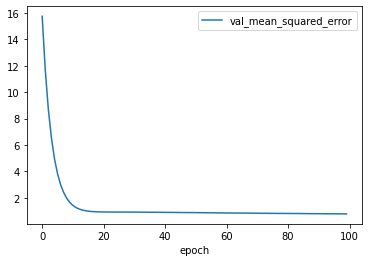

In [ ]:
hist.plot.line(x='epoch', y='val_mean_squared_error');

From the plot we can see that our model *converged* around the 20th epoch. In other words, the most optimal parameters (weights and bias)were found ofter 20 training iterations. 

## 5. Evaluate the model
Now that we trained our model, it's time to evaluate it by using the *test* dataset, which we did not use when training the model. This gives us a sense of how well our model predicts unseen data, which is the case when we use it in the real world. We will use the `evaluate` method to test the model. 

In [ ]:
loss, mae, mse = model.evaluate(test_features, test_labels)
print('Test set Mean Absolute Error: ', round(mae, 4))

1/1 [==============================] - 0s 1ms/step - loss: 0.3837 - mean_absolute_error: 0.5160 - mean_squared_error: 0.3837
Test set Mean Absolute Error:  0.516


The average (absolute) error is around +/- 0.516 units for happiness Score. Is this good? We'll leave that decision up to you. Let's also visualize the prediction and real happiness Score values using data in the test set.

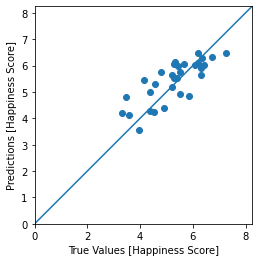

In [ ]:
test_predictions = model.predict(test_features).flatten()

ax = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
lims = [0, max(test_labels) + 1] # [0, 31]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

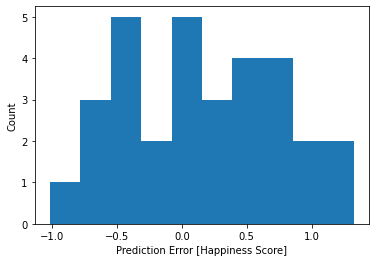

In [ ]:
error = test_predictions.reshape(-1, 1) - test_labels
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Happiness Score]")
_ = plt.ylabel("Count")

The histogram shows that the errors aren't quite *Normally distributed* (also called *gaussian*), but we might expect that because the number of samples is very small.

## 6. Draw Conclusions
We built a single-layer fully-connected neural network model to predict happiness Score given a country's GDP per capita. The model converged after about 20 epochs of training, and it achieved an average (absolute) error of +/- 0.516. We expect that a *deeper* model or more data samples or features could lead to better results on unseen data.     

# Summary
In this lesson we took a deeper dive into regression, translating traditional linear  regression into a single-layer fully-connected neural network. We covered several important techniques to handle regression problems:
- Introduced *loss functions* and *optimization algorithms*.
- Demonstrated preparing data for a model.
- Used Tensorflow to build and train a model. 
- Showed how to evaluate a model.